# Train The Diet Engine

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Feb 12 01:48:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        Off |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P5             21W /  200W |    1347MiB /  12282MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/rahi/Code/diet-engine


## Install YOLO

In [3]:
# Pip install method (recommended)

# !pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.74 🚀 Python-3.12.2 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11894MiB)
Setup complete ✅ (20 CPUs, 31.1 GB RAM, 221.4/467.3 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



In [5]:
%cd {HOME}

/home/rahi/Code/diet-engine


/home/rahi/Code/diet-engine/venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
!mkdir datasets
%cd datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="DsqRgDjjOyXJGtvnMjbE")
project = rf.workspace("seefood-ugh5r").project("seefood-research")
# dataset = project.version(5).download("yolov8")
# dataset = project.version(7).download("yolov8")  # 7 is the f*** worst version
# dataset = project.version(8).download("yolov8")   # Best one so far
dataset = project.version(9).download("yolov11")


mkdir: cannot create directory ‘datasets’: File exists
/home/rahi/Code/diet-engine/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [7]:
print(HOME)
print(dataset.location)

/home/rahi/Code/diet-engine
/home/rahi/Code/diet-engine/datasets/SeeFood---Research-9


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=100 imgsz=480 plots=True batch=32

/home/rahi/Code/diet-engine
Ultralytics 8.3.74 🚀 Python-3.12.2 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11894MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

In [15]:
!ls {HOME}/runs/detect/train

args.yaml			 R_curve.png	       train_batch2.jpg
confusion_matrix_normalized.png  results.csv	       val_batch0_labels.jpg
confusion_matrix.png		 results.png	       val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch16200.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch16201.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch16202.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch1.jpg      weights


/home/rahi/Code/diet-engine


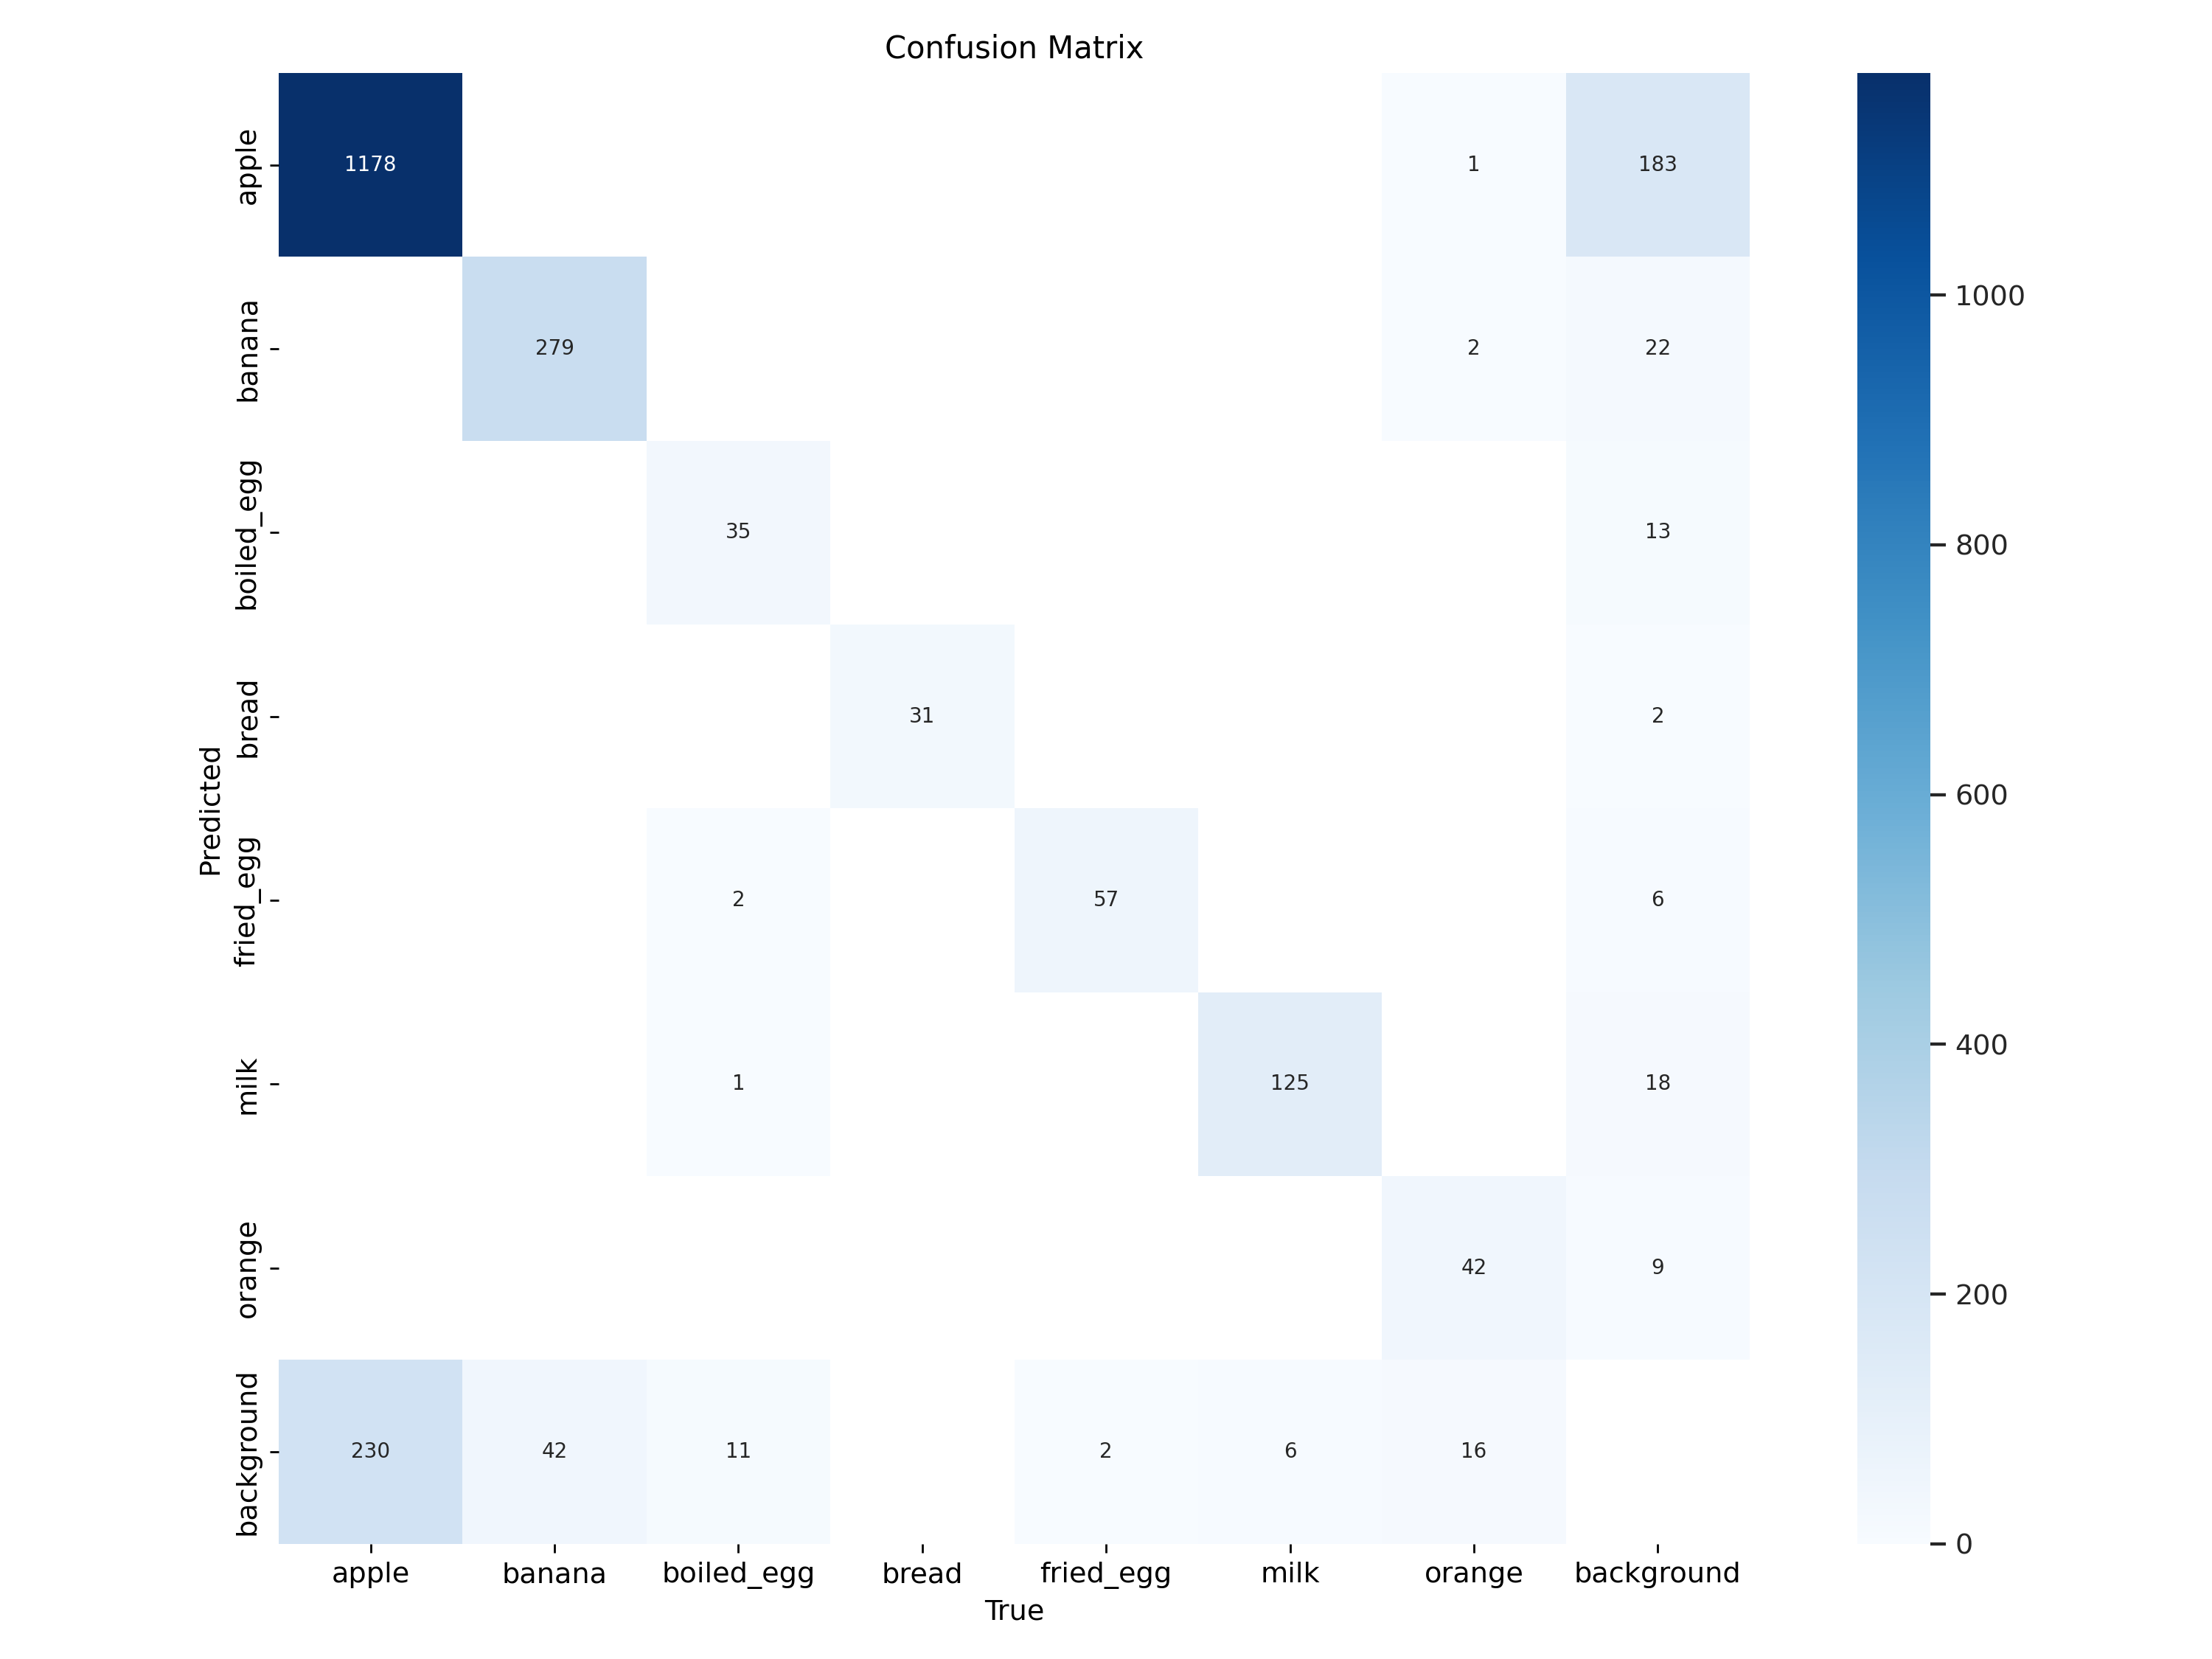

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/rahi/Code/diet-engine


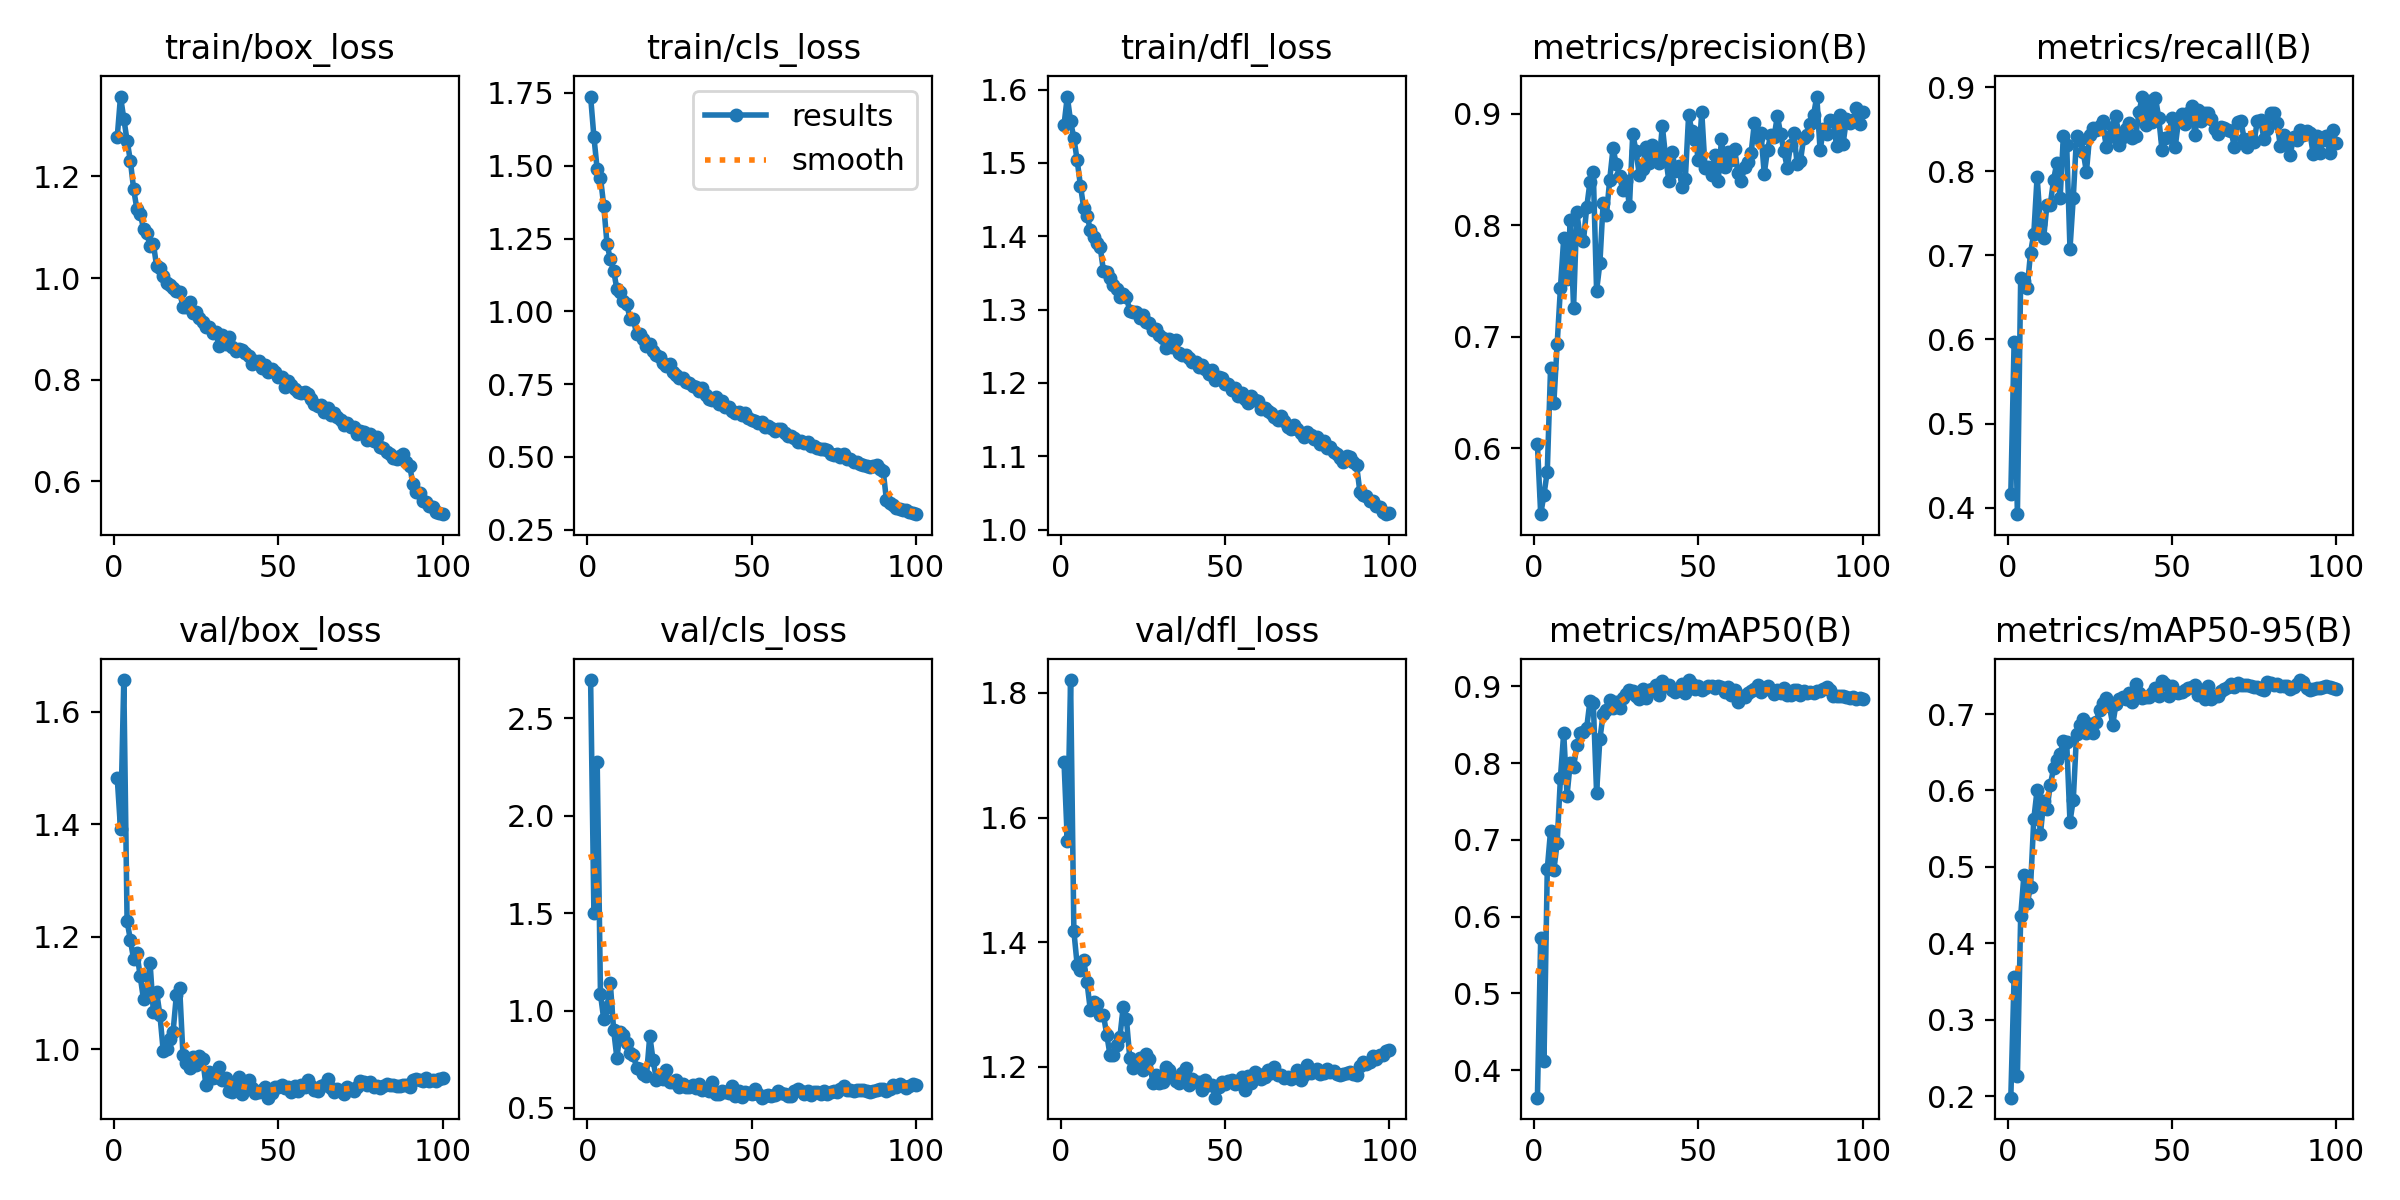

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/rahi/Code/diet-engine


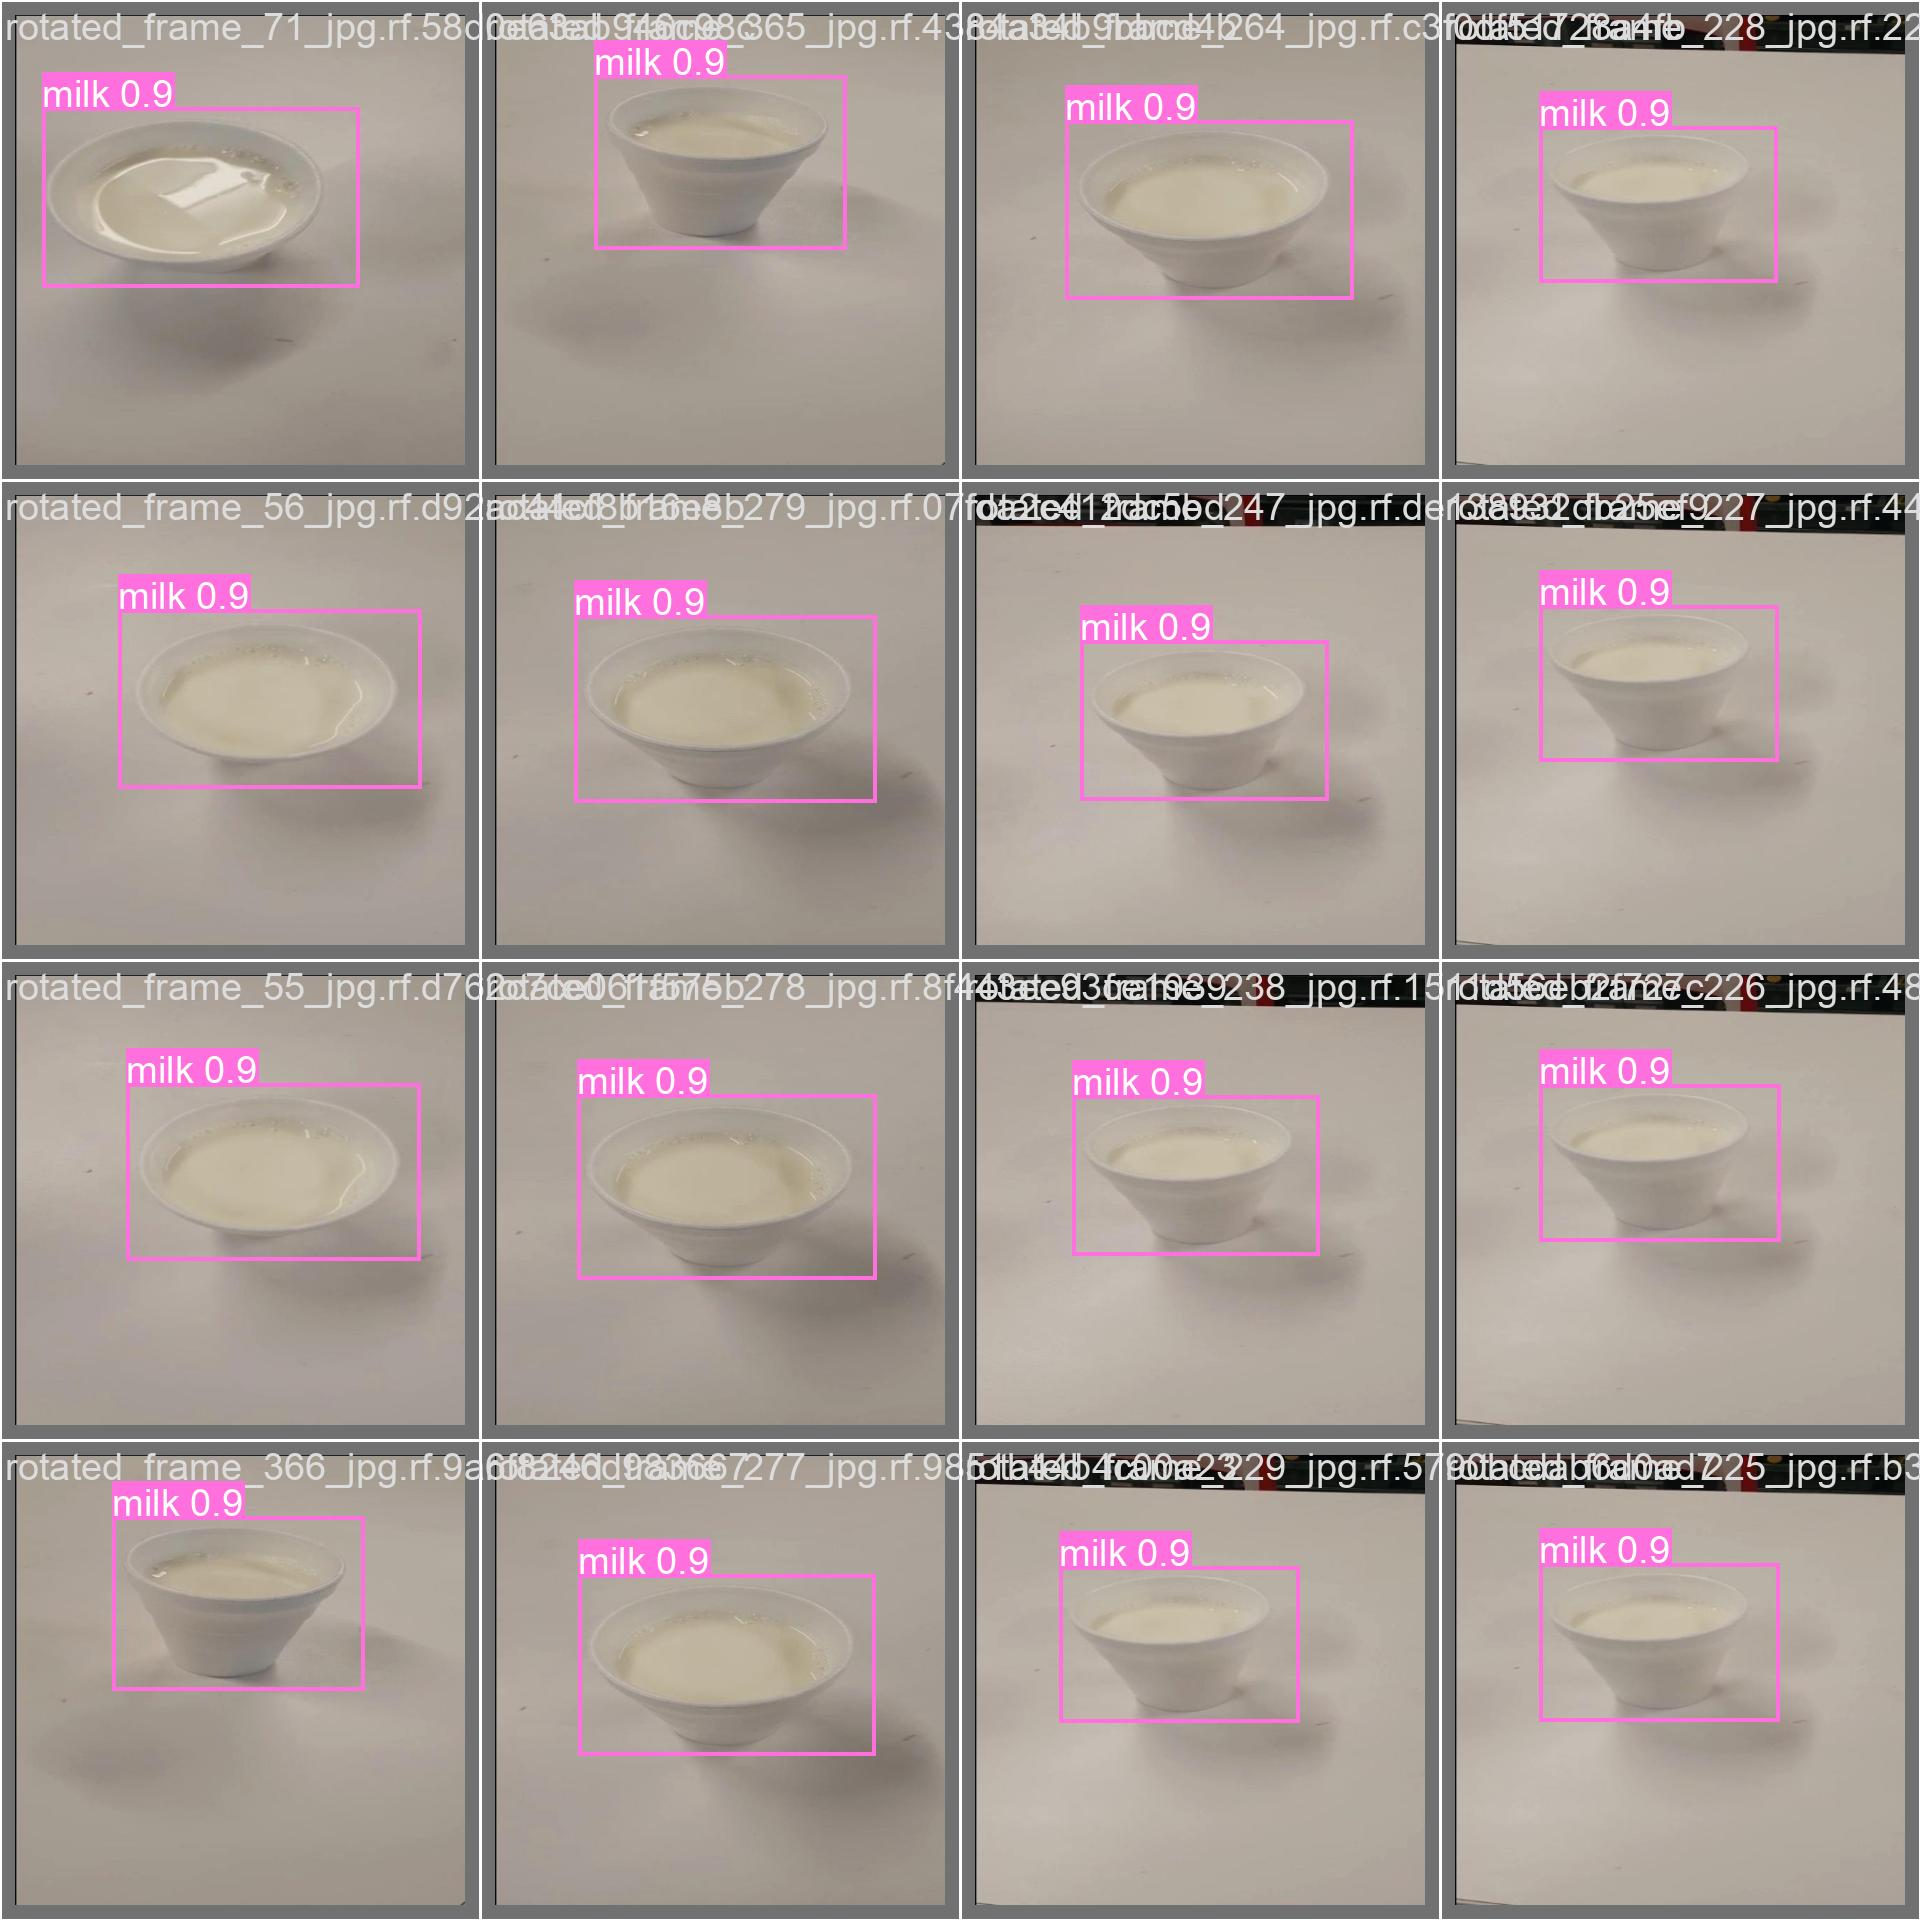

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=datasets/SeeFood---Research-9/data.yaml

/home/rahi/Code/diet-engine
Ultralytics 8.3.74 🚀 Python-3.12.2 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11894MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs
Traceback (most recent call last):
  File "/home/rahi/Code/diet-engine/venv/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/home/rahi/Code/diet-engine/venv/lib/python3.12/site-packages/ultralytics/cfg/__init__.py", line 986, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rahi/Code/diet-engine/venv/lib/python3.12/site-packages/ultralytics/engine/model.py", line 640, in val
    validator(model=self.model)
  File "/home/rahi/Code/diet-engine/venv/lib/python3.12/site-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/rahi/Code/diet-engine/venv/lib/python3.12/site

## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/rahi/Code/diet-engine
Ultralytics 8.3.74 🚀 Python-3.12.2 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11894MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs

image 1/236 /home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/test/images/00000015_jpg.rf.a491298f5b5a45b7efef9fe95f299485.jpg: 480x480 1 milk, 5.1ms
image 2/236 /home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/test/images/00000067_jpg.rf.54ffe29c58bbc53a04480a25f139a4db.jpg: 480x480 1 milk, 4.4ms
image 3/236 /home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/test/images/00000105_jpg.rf.e33770e0d7bf7bebb28b037a0f4b6d91.jpg: 480x480 4 milks, 5.1ms
image 4/236 /home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/test/images/00000111_jpg.rf.8920ec29b7b982ea98ee0e65aaa9f150.jpg: 480x480 1 milk, 4.4ms
image 5/236 /home/rahi/Code/diet-engine/datasets/SeeFood---Research-9/test/images/00000121_jpg.rf.7dd1c67bb85eeb11adf6e713e24d5254.jpg: 480x480 1 milk, 5.3ms

**NOTE:** Let's take a look at few results.

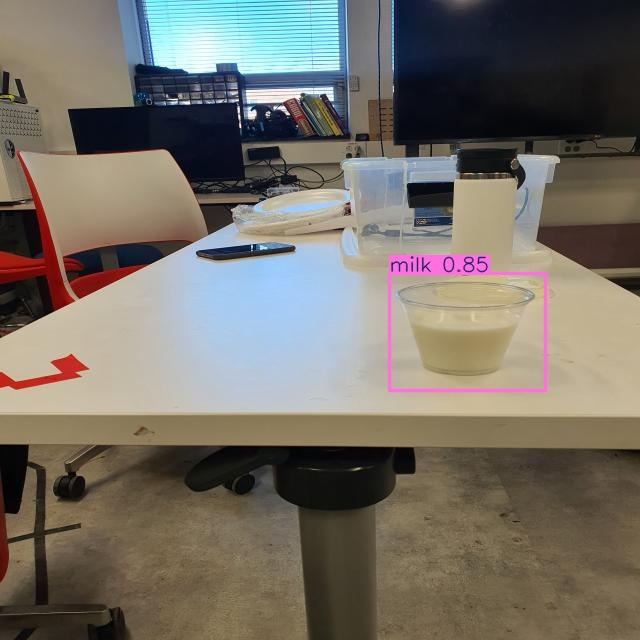

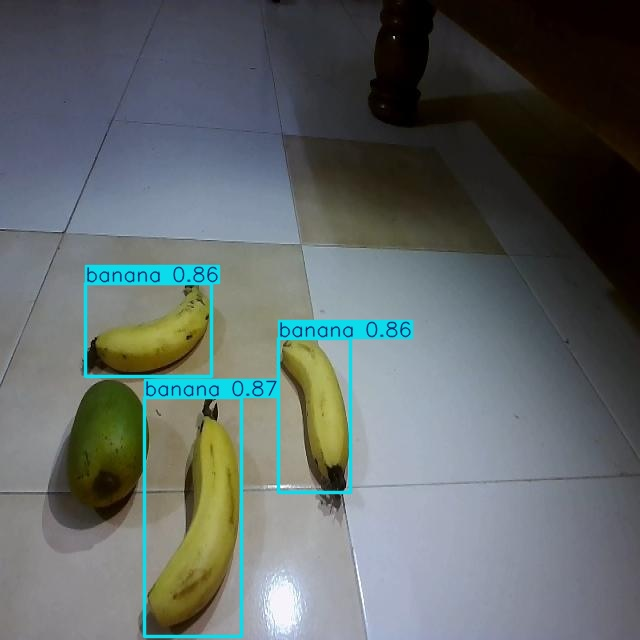

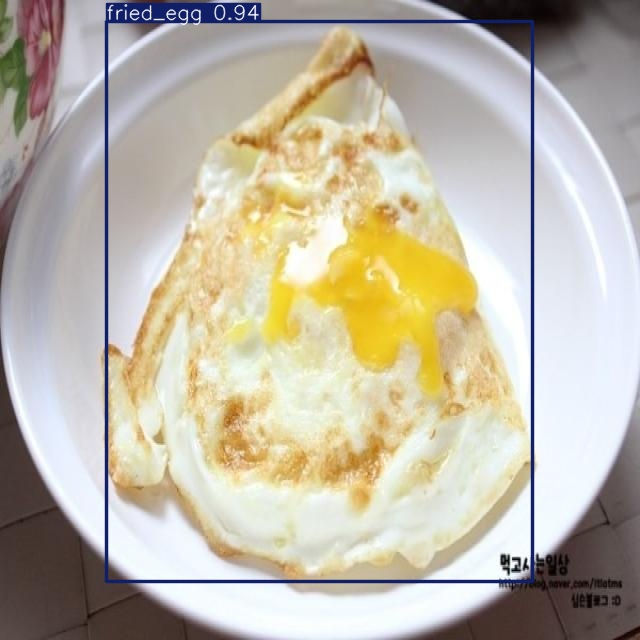

In [21]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# from google.colab import files
# files.download('predict2.zip')
